In [3]:
pip install pandas matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ------------------------ --------------- 7.1/11.5 MB 36.3 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 37.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 45.6 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 47.0 MB/s eta 0:00:00
   ---------------------------------------- 0.


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
file_path = "C:\\Users\\ferronat\\base_datos_1.xlsx"
xls = pd.ExcelFile(file_path)

In [1]:
pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
file_path_1 = "C:\\Users\\ferronat\\base_datos_1.xlsx"
file_path_2 = "C:\\Users\\ferronat\\base_datos_2.xlsx"

xls_1 = pd.ExcelFile(file_path_1)
xls_2 = pd.ExcelFile(file_path_2)

In [103]:
print("Planilhas disponíveis em base_datos_1.xlsx:", xls_1.sheet_names)
print("Planilhas disponíveis em base_datos_2.xlsx:", xls_2.sheet_names)

Planilhas disponíveis em base_datos_1.xlsx: ['Main', 'Sheet12', 'Todos os anos', 'Areas', 'LPI Ability ', 'LPI Competence and quality ', 'LPI Ease of arranging', 'LPI Efficiency ', 'LPI Frequency ', 'Overall', 'LPI Quality of trade and transp', 'Time to export, border (hours)', 'Time to export, doc (hours)', 'Time to import, border (hours)', 'Time to import, doc (hours)', 'Cost to export, border (US$) ', 'Cost to export, doc (US$)', 'Cost to import, border (US$)', 'Cost to import, doc (US$)', 'Avg time to clear exports (days', 'Lead time to export (days)', 'Lead time to import (days)']
Planilhas disponíveis em base_datos_2.xlsx: ['Main2', 'Tabela com todos os anos', 'Sheet3', 'Sheet2', 'Area']


In [104]:
df_main = xls_1.parse(xls_1.sheet_names[0])
df_extra = xls_2.parse(xls_2.sheet_names[0])

In [105]:
df_main = df_main.rename(columns={
    'Unnamed: 0': 'Country',
    'LPI - Overall.1': 'LPI Overall',
    'LPI - Competence and quality of logistics services.1': 'LPI Quality',
    'LPI - Ease of arranging competitively priced shipments.1': 'LPI Ease',
    'LPI - Efficiency of customs clearance process.1': 'LPI Efficiency'
})

df_extra = df_extra.rename(columns={
    'Unnamed: 0': 'Country',
    'LPI - Overall.1': 'LPI Overall',
    'LPI - Competence and quality of logistics services.1': 'LPI Quality',
    'LPI - Ease of arranging competitively priced shipments.1': 'LPI Ease',
    'LPI - Efficiency of customs clearance process.1': 'LPI Efficiency'
})


In [201]:
print(df_main.isnull().sum())
print(df_extra.isnull().sum())

print(df_main.dtypes)
print(df_extra.dtypes)

Country         0
Year            0
LPI -1          0
LPI - 2         0
LPI - 3         0
LPI - 4         0
LPI - 5         0
LPI - 6         0
LPI - 7         0
LPI Category    0
LPI Score       0
dtype: int64
Country    0
Year       0
Time 1     0
Time 2     0
Time 3     0
Time 4     0
Cost 1     0
Cost 2     0
Cost 3     0
Cost 4     0
dtype: int64
Country           object
Year               int64
LPI -1           float64
LPI - 2          float64
LPI - 3          float64
LPI - 4          float64
LPI - 5          float64
LPI - 6          float64
LPI - 7          float64
LPI Category    category
LPI Score        float64
dtype: object
Country     object
Year         int64
Time 1     float64
Time 2     float64
Time 3     float64
Time 4     float64
Cost 1     float64
Cost 2     float64
Cost 3     float64
Cost 4     float64
dtype: object


In [106]:
df_main = df_main.iloc[1:]
df_extra = df_extra.iloc[1:]

In [107]:
df_main['Year'] = df_main['Year'].astype(int)
df_extra['Year'] = df_extra['Year'].astype(int)

In [204]:
df_main.columns = df_main.columns.str.strip()

In [205]:
lpi_cols = [col for col in df_main.columns if col.startswith("LPI -") and df_main[col].dtype in ["float64", "int64"]]

In [206]:
df_main["LPI_Medio"] = df_main[lpi_cols].mean(axis=1)
df_main["LPI_Desvio"] = df_main[lpi_cols].std(axis=1)

In [207]:
df_extra["Tempo_Total"] = df_extra[["Time 1", "Time 2", "Time 3", "Time 4"]].sum(axis=1)
df_extra["Custo_Total"] = df_extra[["Cost 1", "Cost 2", "Cost 3", "Cost 4"]].sum(axis=1)

In [217]:
df_main['Country'] = df_main['Country'].str.strip().str.lower()
df_extra['Country'] = df_extra['Country'].str.strip().str.lower()

In [218]:
df_main['Year'] = df_main['Year'].astype(int)
df_extra['Year'] = df_extra['Year'].astype(int)

In [220]:
main_pairs = set(zip(df_main['Country'], df_main['Year']))
extra_pairs = set(zip(df_extra['Country'], df_extra['Year']))

no_cuadran = main_pairs - extra_pairs

print(f"Pares que no cuadran: {list(no_cuadran)[:5]}")

Pares que no cuadran: [('united kingdom', 4), ('mexico', 3), ('denmark', 2), ('indonesia', 2), ('oman', 3)]


In [224]:
print(df_extra['Year'].unique())
print(df_extra['Year'].value_counts().sort_index())

[2016 2014 2018]
Year
2014    184
2016    185
2018    185
Name: count, dtype: int64


In [225]:
paises_main = set(df_main['Country'])
paises_extra = set(df_extra['Country'])

In [227]:
diferencia = paises_main - paises_extra
print("Países que están en df_main pero no en df_extra:")
print(sorted(diferencia))

Países que están en df_main pero no en df_extra:
['cuba', 'eritrea', 'ivory coast', 'são tomé and principe', 'turkey', 'turkmenistan', 'yemen']


In [228]:
substituir_paises = {
    "ivory coast": "CÃƒÂ´te d'Ivoire",
    "são tomé and principe": "SÃƒÂ£o TomÃƒÂ© and Principe",
    "turkey": "TÃƒÂ¼rkiye",
}

df_main['Country'] = df_main['Country'].replace(substituir_paises)

In [229]:
paises_invalidos = ['yemen']
df_main = df_main[~df_main['Country'].isin(paises_invalidos)]

In [257]:
print(df_union.shape)

(470, 23)


In [258]:
print(df_main['Year'].unique())
print(df_main[['Country', 'Year']].head(10))

[2016 2018 2014]
        Country  Year
1   afghanistan  2016
2   afghanistan  2016
3       albania  2016
4       albania  2016
5       algeria  2016
6       algeria  2016
7       algeria  2016
8        angola  2016
9        angola  2016
10       angola  2016


In [259]:
year_map = {
    1: 2014,
    2: 2016,
    3: 2018
}

df_main['Year'] = df_main['Year'].replace(year_map)

In [260]:
print(df_main['Year'].value_counts())

Year
2016    298
2018    144
2014     28
Name: count, dtype: int64


In [261]:
df_main['Year'] = df_main['Year'].replace(4, 2014)

In [262]:
print(df_main['Year'].value_counts())

Year
2016    298
2018    144
2014     28
Name: count, dtype: int64


In [263]:
df_union = df_main.merge(df_extra, on=['Country', 'Year'], how='left')

In [264]:
print(df_union.head())

       Country  Year    LPI -1   LPI - 2   LPI - 3   LPI - 4   LPI - 5  \
0  afghanistan  2016  1.772402  2.145073  2.375026  2.011147  2.611203   
1  afghanistan  2016  1.847776  2.119709  1.986686  2.163453  2.482138   
2      albania  2016  2.670000  2.560000  2.820000  2.350000  3.200000   
3      albania  2016  2.151499  2.484833  2.484833  2.234391  3.050476   
4      algeria  2016  2.600000  2.390000  2.390000  2.130000  2.760000   

    LPI - 6   LPI - 7 LPI Category  ...  Time 1    Time 2    Time 3    Time 4  \
0  1.835473  2.141282          Low  ...    48.0  228.0000   96.0000  324.0000   
1  1.818951  2.069573          Low  ...    48.0  228.0000   96.0000  324.0000   
2  2.290000  2.660000          Low  ...     9.0    6.0000   10.0000    8.0000   
3  1.980952  2.412498          Low  ...     9.0    6.0000   10.0000    8.0000   
4  2.420000  2.450000          Low  ...    80.0  149.1429  327.3896  248.7273   

     Cost 1    Cost 2    Cost 3    Cost 4  Tempo_Total  Custo_Total 

In [269]:
correlation = df_union.corr(numeric_only=True)
print(correlation)

                 Year    LPI -1   LPI - 2   LPI - 3   LPI - 4   LPI - 5  \
Year         1.000000  0.333228  0.312089  0.316126  0.312166  0.325879   
LPI -1       0.333228  1.000000  0.943570  0.888750  0.902339  0.908248   
LPI - 2      0.312089  0.943570  1.000000  0.907297  0.930679  0.915088   
LPI - 3      0.316126  0.888750  0.907297  1.000000  0.876333  0.880394   
LPI - 4      0.312166  0.902339  0.930679  0.876333  1.000000  0.870194   
LPI - 5      0.325879  0.908248  0.915088  0.880394  0.870194  1.000000   
LPI - 6      0.312338  0.926416  0.954382  0.891824  0.938080  0.900733   
LPI - 7      0.331097  0.965820  0.979927  0.943534  0.956570  0.948895   
LPI Score    0.331168  0.966222  0.980181  0.941112  0.957106  0.948608   
LPI_Medio    0.331168  0.966222  0.980181  0.941112  0.957106  0.948608   
LPI_Desvio  -0.009353 -0.086872 -0.147204 -0.107057 -0.253684  0.137756   
Time 1      -0.201292 -0.442433 -0.449575 -0.447044 -0.481648 -0.459445   
Time 2      -0.189571 -0.

In [270]:
correlation = df_union.corr(numeric_only=True)

In [284]:
plt.figure(figsize=(24, 18))

<Figure size 2400x1800 with 0 Axes>

<Figure size 2400x1800 with 0 Axes>

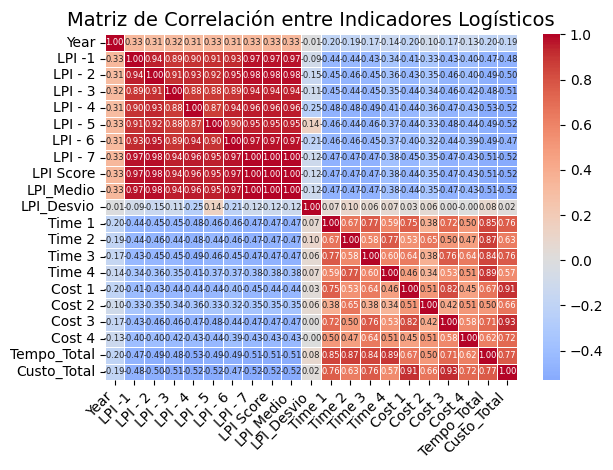

In [285]:
sns.heatmap(
    correlation,
    annot=True,            
    fmt=".2f",             
    cmap="coolwarm",       
    center=0,              
    linewidths=0.5,
    annot_kws={"size": 6}         
)

plt.title("Matriz de Correlación entre Indicadores Logísticos", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [286]:
plt.savefig("correlacao_logistica.png", dpi=300)

<Figure size 640x480 with 0 Axes>

In [288]:
df_main.head()

,Country,Year,LPI -1,LPI - 2,LPI - 3,LPI - 4,LPI - 5,LPI - 6,LPI - 7,LPI Category,LPI Score,LPI_Medio,LPI_Desvio
1,afghanistan,2016,1.772402,2.145073,2.375026,2.011147,2.611203,1.835473,2.141282,Low,2.127372,2.127372,0.294576
2,afghanistan,2016,1.847776,2.119709,1.986686,2.163453,2.482138,1.818951,2.069573,Low,2.069755,2.069755,0.223760
3,albania,2016,2.670000,2.560000,2.820000,2.350000,3.200000,2.290000,2.660000,Low,2.650000,2.650000,0.305396
4,albania,2016,2.151499,2.484833,2.484833,2.234391,3.050476,1.980952,2.412498,Low,2.399926,2.399926,0.342162
5,algeria,2016,2.600000,2.390000,2.390000,2.130000,2.760000,2.420000,2.450000,Low,2.448571,2.448571,0.195399


In [289]:
columns_to_convert = ['LPI -1', 'LPI - 2', 'LPI - 3', 'LPI - 4', 'LPI - 5', 'LPI - 6', 'LPI - 7']
df_main[columns_to_convert] = df_main[columns_to_convert].astype(float)

In [290]:
df_main['Year'] = df_main['LPI - 7'].shift(-1)

In [291]:
df_main = df_main.dropna()

In [292]:
df_main = df_main.copy()
df_main['Year'] = df_main['Year'].astype(int)

In [293]:
df_main[['LPI -1', 'LPI - 2', 'LPI - 3', 'LPI - 4', 
         'LPI - 5', 'LPI - 6', 'LPI - 7']] = df_main[['LPI -1', 'LPI - 2', 
                                                      'LPI - 3', 'LPI - 4', 
                                                      'LPI - 5', 'LPI - 6', 
                                                      'LPI - 7']].fillna(0)


In [294]:
df_main['LPI Score'] = df_main[['LPI -1', 'LPI - 2', 'LPI - 3', 'LPI - 4', 
                                'LPI - 5', 'LPI - 6', 'LPI - 7']].mean(axis=1)

In [295]:
def categorize_lpi(score):
    if score >= 4:
        return 'High'
    elif score >= 3:
        return 'Medium'
    else:
        return 'Low'

df_main['LPI Category'] = df_main['LPI Score'].apply(categorize_lpi)

In [296]:
print(df_main['LPI Category'].isna().sum())

0


In [297]:
df_main = df_main.dropna(subset=['LPI Category'])

In [298]:
def plot_lpi_evolution(country_list):
    plt.figure(figsize=(10, 6))
    for country in country_list:
        country_data = df_main[df_main['Country'] == country]
        plt.plot(country_data['Year'], country_data['LPI - 7'], marker='o', label=country)
    
    plt.xlabel('Ano')
    plt.ylabel('LPI Overall')
    plt.title('Evolución del Índice LPI a lo largo de los años')
    plt.legend()
    plt.grid()
    plt.show()

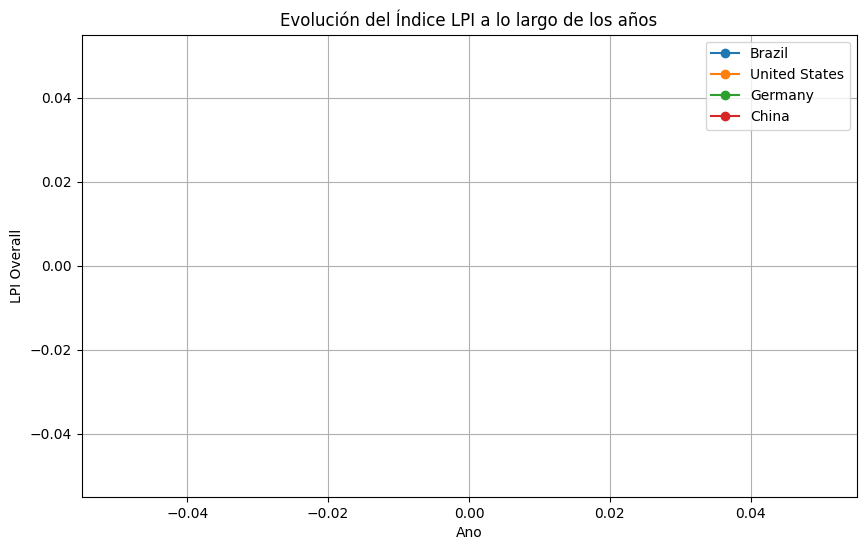

In [299]:
countries_to_plot = ['Brazil', 'United States', 'Germany', 'China']
plot_lpi_evolution(countries_to_plot)

In [300]:
print(df_main.columns)

Index(['Country', 'Year', 'LPI -1', 'LPI - 2', 'LPI - 3', 'LPI - 4', 'LPI - 5',
       'LPI - 6', 'LPI - 7', 'LPI Category', 'LPI Score', 'LPI_Medio',
       'LPI_Desvio'],
      dtype='object')


In [301]:
print(df_main[['LPI Score', 'LPI Category']].head())

   LPI Score LPI Category
1   2.127372          Low
2   2.069755          Low
3   2.650000          Low
4   2.399926          Low
5   2.448571          Low


In [302]:
print(df_main[['Country', 'Year', 'LPI -1', 'LPI - 2', 'LPI - 3', 'LPI - 4', 'LPI - 5',
       'LPI - 6', 'LPI - 7', 'LPI Score', 'LPI Category',]].head())

       Country  Year    LPI -1   LPI - 2   LPI - 3   LPI - 4   LPI - 5  \
1  afghanistan     2  1.772402  2.145073  2.375026  2.011147  2.611203   
2  afghanistan     2  1.847776  2.119709  1.986686  2.163453  2.482138   
3      albania     2  2.670000  2.560000  2.820000  2.350000  3.200000   
4      albania     2  2.151499  2.484833  2.484833  2.234391  3.050476   
5      algeria     2  2.600000  2.390000  2.390000  2.130000  2.760000   

    LPI - 6   LPI - 7  LPI Score LPI Category  
1  1.835473  2.141282   2.127372          Low  
2  1.818951  2.069573   2.069755          Low  
3  2.290000  2.660000   2.650000          Low  
4  1.980952  2.412498   2.399926          Low  
5  2.420000  2.450000   2.448571          Low  


In [303]:
print(df_main.dtypes)

Country          object
Year              int64
LPI -1          float64
LPI - 2         float64
LPI - 3         float64
LPI - 4         float64
LPI - 5         float64
LPI - 6         float64
LPI - 7         float64
LPI Category     object
LPI Score       float64
LPI_Medio       float64
LPI_Desvio      float64
dtype: object


In [304]:
print(df_main.columns.value_counts())

Country         1
Year            1
LPI -1          1
LPI - 2         1
LPI - 3         1
LPI - 4         1
LPI - 5         1
LPI - 6         1
LPI - 7         1
LPI Category    1
LPI Score       1
LPI_Medio       1
LPI_Desvio      1
Name: count, dtype: int64


In [305]:
if 'LPI Category' not in df_main.columns:
    df_main['LPI Category'] = df_main['LPI Score'].apply(categorize_lpi)

In [306]:
df_main = df_main.loc[:, ~df_main.columns.duplicated()]

In [307]:
print(df_main.shape)

(469, 13)


In [308]:
df_main['LPI Category'] = df_main['LPI Category'].astype('category')

In [309]:
summary_stats = df_main.groupby('LPI Category').mean(numeric_only=True)
print("Resumo Estatístico por Categoria LPI:")
print(summary_stats)

Resumo Estatístico por Categoria LPI:
                  Year    LPI -1   LPI - 2   LPI - 3   LPI - 4   LPI - 5  \
LPI Category                                                               
High          3.391304  4.124142  4.100117  3.822379  3.938026  4.365629   
Low           2.153595  2.510436  2.456067  2.547498  2.344843  2.901737   
Medium        2.714286  3.508830  3.431202  3.356072  3.277236  3.833446   

               LPI - 6   LPI - 7  LPI Score  LPI_Medio  LPI_Desvio  
LPI Category                                                        
High          4.189952  4.083136   4.089054   4.089054    0.199135  
Low           2.326754  2.519463   2.515257   2.515257    0.242243  
Medium        3.423458  3.469901   3.471449   3.471449    0.227932  


C:\Users\ferronat\AppData\Local\Temp\ipykernel_34500\431484534.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



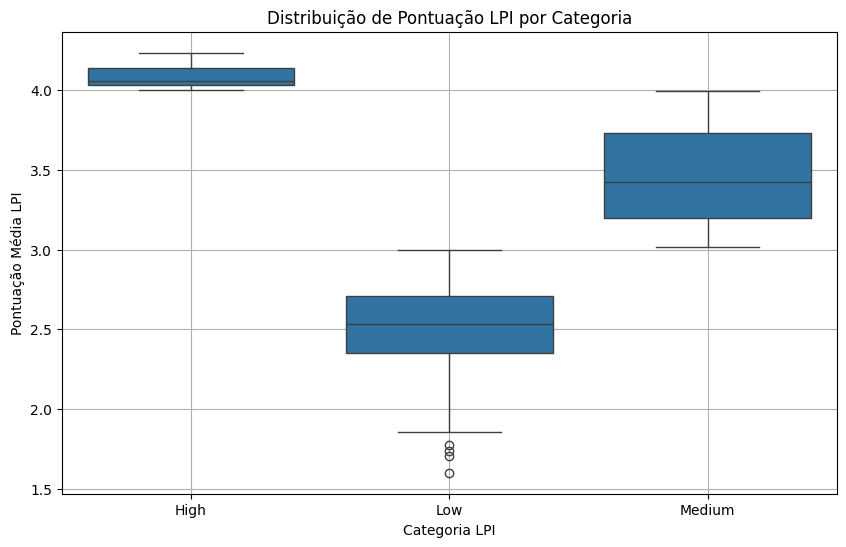

In [310]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_main, x='LPI Category', y='LPI Score')
plt.xlabel('Categoria LPI')
plt.ylabel('Pontuação Média LPI')
plt.title('Distribuição de Pontuação LPI por Categoria')
plt.grid()
plt.show()

In [311]:
!pip install pandas-profiling

  Using cached pandas_profiling-3.2.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached scipy-1.15.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pydantic-2.10.6-py3-none-any.whl.metadata (30 kB)
  Using cached PyYAML-6.0.2-cp313-cp313-win_amd64.whl.metadata (2.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached MarkupSafe-2.1.5.tar.gz (19 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [27 lines of output]
      Traceback (most recent call last):
        File "C:\Users\ferronat\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
          ~~~~^^
        File "C:\Users\ferronat\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\ferronat\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
        File "C:\Users\ferronat\AppData\Local\Temp\pip-build-env-jimuzpn6\overlay\Li

In [312]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached scipy-1.15.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached pydantic-2.10.6-py3-none-any.whl.metadata (30 kB)
  Using cached PyYAML-6.0.2-cp313-cp313-win_amd64.whl.metadata (2.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
  Using cached numpy-2.1.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Installing build dependencies: started
  Installing buil

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [27 lines of output]
      Traceback (most recent call last):
        File "c:\Users\ferronat\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
          ~~~~^^
        File "c:\Users\ferronat\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\ferronat\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
        File "C:\Users\ferronat\AppData\Local\Temp\pip-build-env-eli8c_vf\overlay\Li

In [313]:
df_main.head(10)

,Country,Year,LPI -1,LPI - 2,LPI - 3,LPI - 4,LPI - 5,LPI - 6,LPI - 7,LPI Category,LPI Score,LPI_Medio,LPI_Desvio
1,afghanistan,2,1.772402,2.145073,2.375026,2.011147,2.611203,1.835473,2.141282,Low,2.127372,2.127372,0.294576
2,afghanistan,2,1.847776,2.119709,1.986686,2.163453,2.482138,1.818951,2.069573,Low,2.069755,2.069755,0.223760
3,albania,2,2.670000,2.560000,2.820000,2.350000,3.200000,2.290000,2.660000,Low,2.650000,2.650000,0.305396
4,albania,2,2.151499,2.484833,2.484833,2.234391,3.050476,1.980952,2.412498,Low,2.399926,2.399926,0.342162
5,algeria,2,2.600000,2.390000,2.390000,2.130000,2.760000,2.420000,2.450000,Low,2.448571,2.448571,0.195399
6,algeria,2,2.856771,2.912498,2.801043,2.368421,3.079681,2.577318,2.769683,Low,2.766488,2.766488,0.232023
7,algeria,2,2.540816,2.540816,2.540816,2.714286,3.040816,2.540816,2.649451,Low,2.652545,2.652545,0.184621
8,angola,2,2.000000,2.000000,2.200000,1.570000,2.590000,1.860000,2.050000,Low,2.038571,2.038571,0.312166
9,angola,2,2.211879,2.310630,2.370738,1.796833,2.589369,2.133789,2.241183,Low,2.236346,2.236346,0.242390
10,angola,2,2.588950,2.311173,2.789474,2.368421,3.023951,2.105263,2.542980,Low,2.532887,2.532887,0.308030


In [314]:
df_main.describe()

,Year,LPI -1,LPI - 2,LPI - 3,LPI - 4,LPI - 5,LPI - 6,LPI - 7,LPI Score,LPI_Medio,LPI_Desvio
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,2.381663,2.887601,2.827777,2.851385,2.701300,3.251649,2.745501,2.879859,2.877867,2.877867,0.235857
std,0.596790,0.627952,0.609179,0.523076,0.598713,0.589286,0.682813,0.578406,0.581684,0.581684,0.076030
min,1.000000,1.513605,1.394253,1.362654,1.111111,1.875000,1.237654,1.598322,1.600226,1.600226,0.068957
25%,2.000000,2.422016,2.350000,2.450475,2.300000,2.790000,2.233136,2.430098,2.428270,2.428270,0.179447
50%,2.000000,2.780000,2.700000,2.780000,2.580000,3.177934,2.560000,2.733896,2.735820,2.735820,0.227628
75%,3.000000,3.300000,3.203985,3.260000,3.105066,3.696094,3.169237,3.260446,3.258666,3.258666,0.282965
max,4.000000,4.377678,4.310000,4.235000,4.207790,4.795714,4.439356,4.225967,4.234777,4.234777,0.528152


In [315]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 469 entries, 1 to 471
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Country       469 non-null    object  
 1   Year          469 non-null    int64   
 2   LPI -1        469 non-null    float64 
 3   LPI - 2       469 non-null    float64 
 4   LPI - 3       469 non-null    float64 
 5   LPI - 4       469 non-null    float64 
 6   LPI - 5       469 non-null    float64 
 7   LPI - 6       469 non-null    float64 
 8   LPI - 7       469 non-null    float64 
 9   LPI Category  469 non-null    category
 10  LPI Score     469 non-null    float64 
 11  LPI_Medio     469 non-null    float64 
 12  LPI_Desvio    469 non-null    float64 
dtypes: category(1), float64(10), int64(1), object(1)
memory usage: 48.2+ KB


In [316]:
numeric_cols = df_main.select_dtypes(include=['number'])

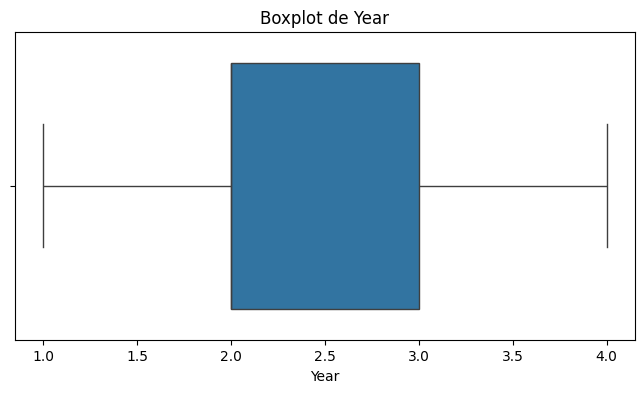

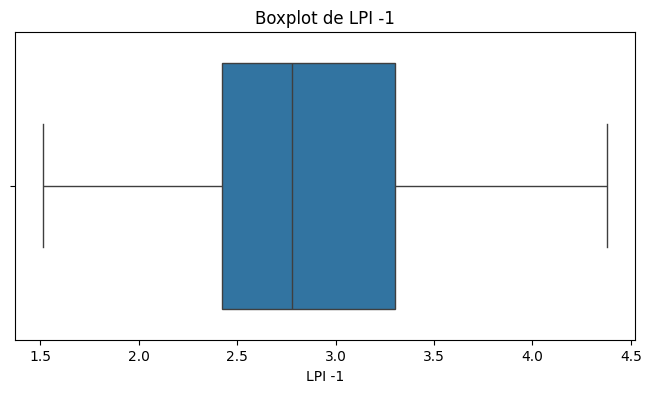

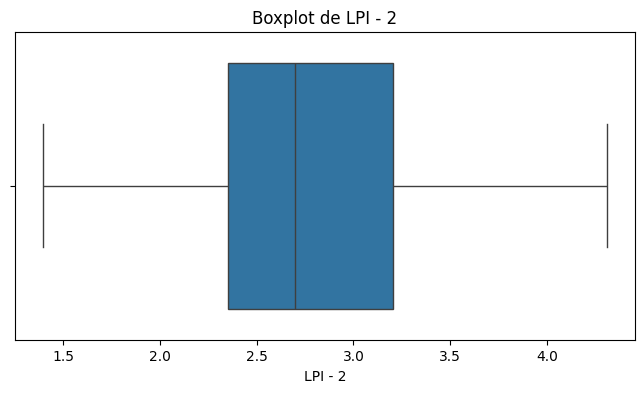

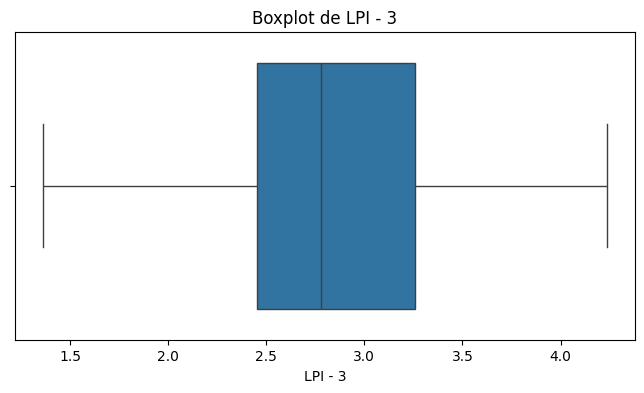

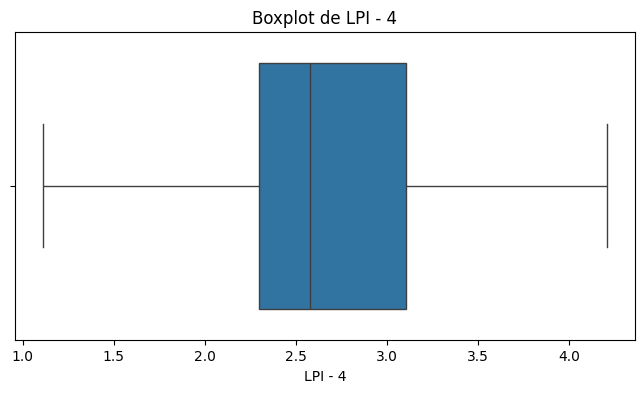

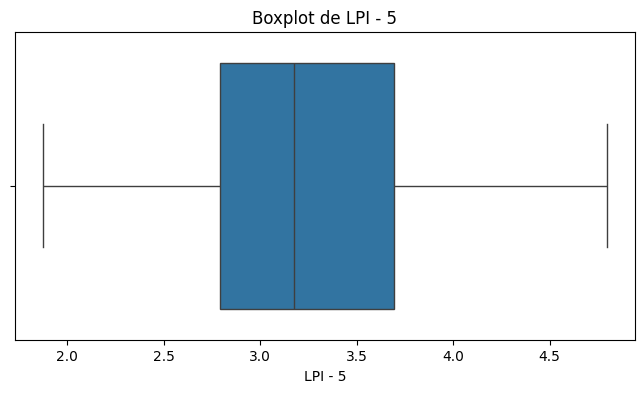

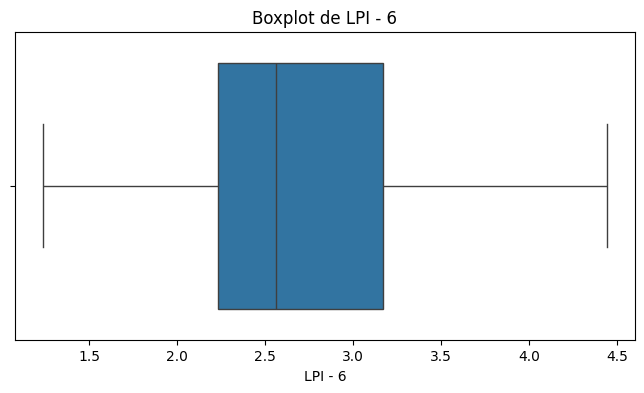

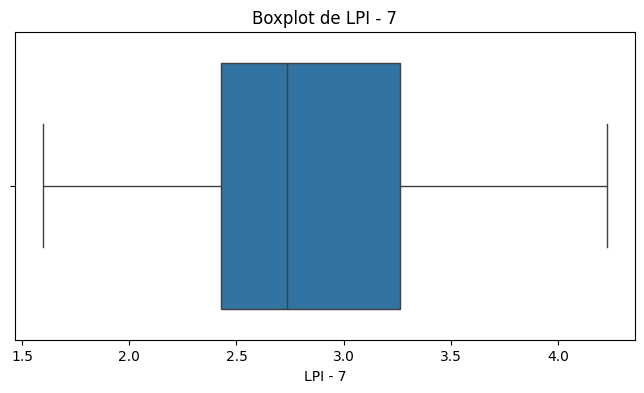

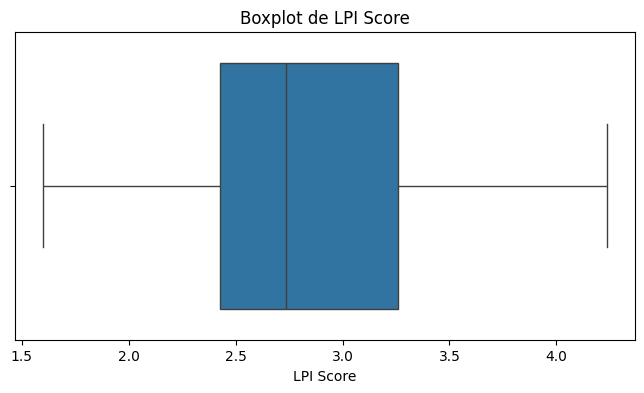

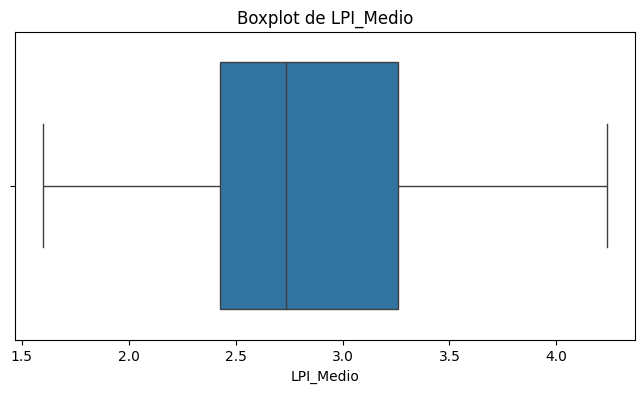

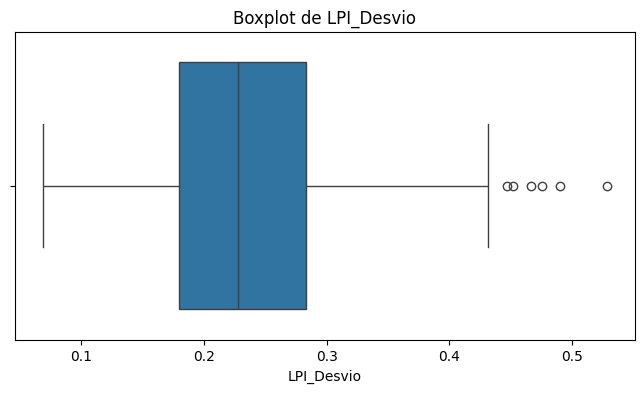

In [317]:
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_main[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

In [318]:
pip install geopandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [319]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [320]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [321]:
import plotly.express as px

In [322]:
df = px.data.gapminder()

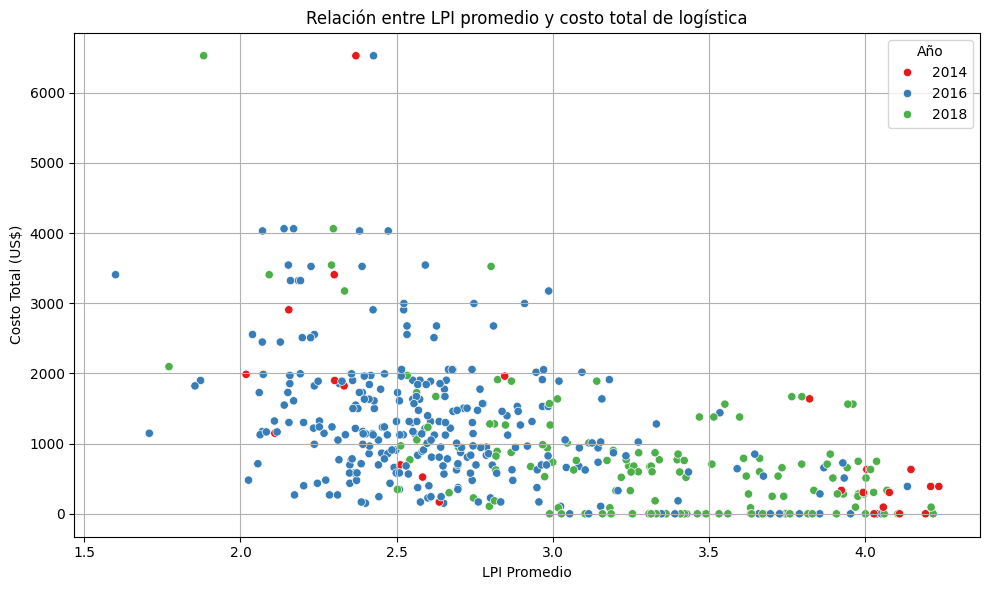

In [324]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_union, x="LPI_Medio", y="Custo_Total", hue="Year", palette="Set1")

plt.title("Relación entre LPI promedio y costo total de logística")
plt.xlabel("LPI Promedio")
plt.ylabel("Costo Total (US$)")
plt.legend(title="Año")
plt.grid(True)
plt.tight_layout()
plt.show()

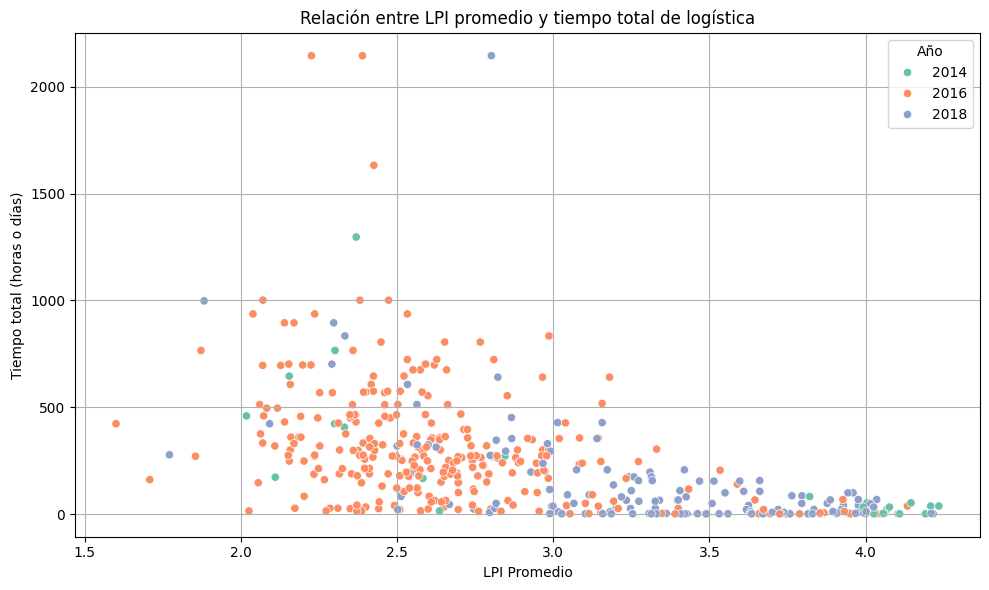

In [326]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_union, x="LPI_Medio", y="Tempo_Total", hue="Year", palette="Set2")

plt.title("Relación entre LPI promedio y tiempo total de logística")
plt.xlabel("LPI Promedio")
plt.ylabel("Tiempo total (horas o días)")
plt.legend(title="Año")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\ferronat\AppData\Local\Temp\ipykernel_34500\485598490.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




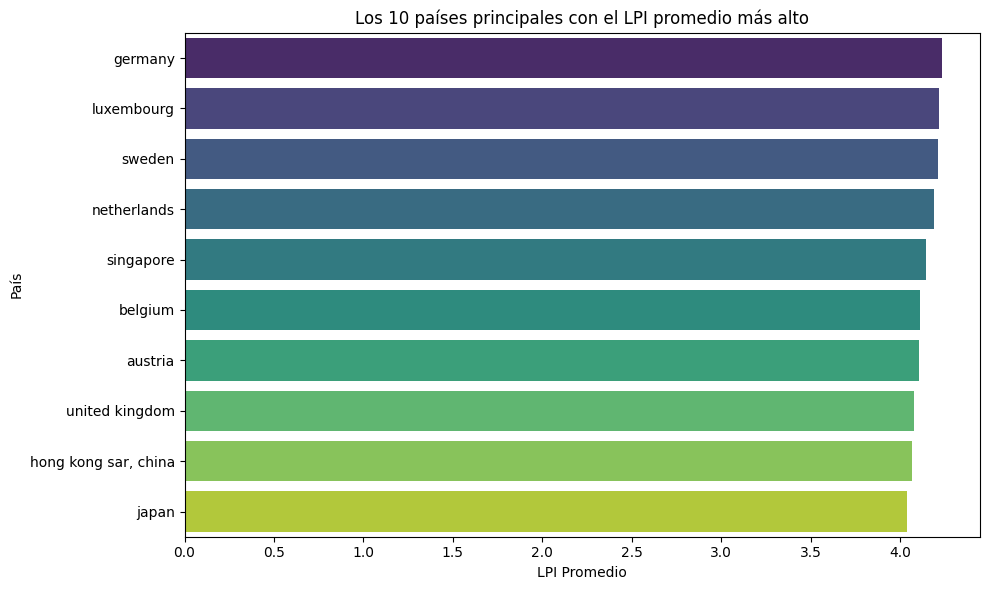

In [328]:
top_paises = df_union.groupby("Country")["LPI_Medio"].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_paises.values, y=top_paises.index, palette="viridis")

plt.title("Los 10 países principales con el LPI promedio más alto")
plt.xlabel("LPI Promedio")
plt.ylabel("País")
plt.tight_layout()
plt.show()

In [329]:
pip install pycountry

   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 33.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [330]:
import pycountry

def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None

df_union['Country_clean'] = df_union['Country'].str.title().str.strip()
df_union['ISO3'] = df_union['Country_clean'].apply(get_iso3)

missing_iso = df_union[df_union['ISO3'].isnull()]['Country_clean'].unique()
print("Países sem código ISO:", missing_iso)

Países sem código ISO: ['Brunei' "Cãƒâ´Te D'Ivoire" 'Dem. Rep. Congo' 'Hong Kong Sar, China'
 'Korea' 'Lao Pdr' 'Russia' 'Sãƒâ£O Tomãƒâ© And Principe' 'Tãƒâ¼Rkiye'
 'The Bahamas' 'The Gambia']


In [331]:
correciones_paises = {
    "Cãƒâ´Te D'Ivoire": "Côte d'Ivoire",
    "Dem. Rep. Congo": "Democratic Republic of the Congo",
    "Hong Kong Sar, China": "Hong Kong",
    "Korea": "South Korea",
    "Lao Pdr": "Laos",
    "Russia": "Russian Federation",
    "Sãƒâ£O Tomãƒâ© And Principe": "Sao Tome and Principe",
    "Tãƒâ¼Rkiye": "Turkey",
    "The Bahamas": "Bahamas",
    "The Gambia": "Gambia",
    "Brunei": "Brunei Darussalam"
}

df_union['Country_clean'] = df_union['Country_clean'].replace(correciones_paises)

df_union['ISO3'] = df_union['Country_clean'].apply(get_iso3)

missing_iso = df_union[df_union['ISO3'].isnull()]['Country_clean'].unique()
print("Países todavia sin código ISO:", missing_iso)

Países todavia sin código ISO: ['Democratic Republic of the Congo' 'Turkey']


In [332]:
df_union.loc[df_union['Country_clean'] == 'Democratic Republic of the Congo', 'ISO3'] = 'COD'
df_union.loc[df_union['Country_clean'] == 'Turkey', 'ISO3'] = 'TUR'

In [333]:
print(df_union[df_union['ISO3'].isnull()]['Country_clean'].unique())

[]


In [336]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [338]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------------- ---------------------- 0.8/1.8 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
Note: you may need to restart the kernel to use updated packages.


In [340]:
import plotly.io as pio
pio.renderers.default = 'browser'

In [341]:
import plotly.express as px

df_lpi = df_union[df_union['Year'] == 2018]

fig = px.choropleth(
    df_lpi,
    locations="ISO3",
    color="LPI_Medio",
    hover_name="Country_clean",
    color_continuous_scale="Blues",
    title="Mapa Mundial - Índice Logístico Promedio (LPI Medio) - Año 2018"
)

fig.update_layout(
    coloraxis_colorbar=dict(title="LPI Medio"),
    geo=dict(showframe=False, showcoastlines=True)
)

fig.show()

In [342]:
fig = px.choropleth(
    df_lpi,
    locations="ISO3",
    color="Custo_Total",
    hover_name="Country_clean",
    color_continuous_scale="Reds",
    title="Mapa Mundial - Costo Total Logístico (USD) - Año 2018"
)

fig.update_layout(
    coloraxis_colorbar=dict(title="Costo Total (US$)"),
    geo=dict(showframe=False, showcoastlines=True)
)

fig.show()

In [344]:
df_union["Indice_LPI_Custo"] = df_union["LPI_Medio"] / df_union["Custo_Total"]

In [345]:
df_lpi = df_union[df_union['Year'] == 2018]

In [346]:
print(df_union.columns)

Index(['Country', 'Year', 'LPI -1', 'LPI - 2', 'LPI - 3', 'LPI - 4', 'LPI - 5',
       'LPI - 6', 'LPI - 7', 'LPI Category', 'LPI Score', 'LPI_Medio',
       'LPI_Desvio', 'Time 1', 'Time 2', 'Time 3', 'Time 4', 'Cost 1',
       'Cost 2', 'Cost 3', 'Cost 4', 'Tempo_Total', 'Custo_Total',
       'Country_clean', 'ISO3', 'Indice_LPI_Custo'],
      dtype='object')


In [347]:
import plotly.express as px

fig = px.choropleth(
    df_lpi,
    locations="ISO3",
    color="Indice_LPI_Custo",
    hover_name="Country_clean",
    color_continuous_scale="Viridis",
    title="Mapa Mundial - Índice de Eficiencia Logística (LPI / Costo) - Año 2018"
)

fig.update_layout(
    coloraxis_colorbar=dict(title="Eficiencia Logística"),
    geo=dict(showframe=False, showcoastlines=True)
)

fig.show()

In [348]:
df_union["Indice_LPI_Custo"] = df_union["LPI_Medio"] / df_union["Custo_Total"]

In [350]:
import plotly.express as px

fig = px.choropleth(
    df_union,
    locations="ISO3",
    color="Indice_LPI_Custo",
    hover_name="Country_clean",
    animation_frame="Year", 
    color_continuous_scale="Viridis",
    range_color=[0, df_union["Indice_LPI_Custo"].max()], 
    title="Evolución del Índice de Eficiencia Logística (LPI / Costo Total)"
)

fig.update_layout(
    coloraxis_colorbar=dict(title="Eficiencia Logística"),
    geo=dict(showframe=False, showcoastlines=True)
)

fig.show()

In [351]:
fig.write_html("mapa_eficiencia_logistica_animado.html")

In [354]:
df_union['Country_padrao'] = df_union['Country'].str.strip().str.lower()

In [359]:
latam = ['argentina', 'bolivia', 'brazil', 'chile', 'colombia', 'costa rica', 'cuba', 'dominican republic',
         'ecuador', 'el salvador', 'guatemala', 'honduras', 'mexico', 'nicaragua', 'panama', 'paraguay',
         'peru', 'uruguay', 'venezuela']

norte_america = ['canada', 'united states']
europa = ['germany', 'france', 'italy', 'spain', 'portugal', 'sweden', 'norway', 'netherlands', 'austria',
          'switzerland', 'finland', 'belgium', 'denmark', 'ireland', 'poland', 'greece', 'hungary',
          'romania', 'bulgaria', 'czechia', 'slovak republic', 'croatia', 'slovenia', 'lithuania', 
          'latvia', 'estonia', 'luxembourg', 'iceland', 'malta', 'cyprus', 'bosnia and herzegovina',
          'serbia', 'montenegro', 'north macedonia', 'albania', 'ukraine', 'moldova']

africa = ['angola', 'algeria', 'benin', 'botswana', 'burkina faso', 'burundi', 'cameroon', 
          'central african republic', 'chad', 'comoros', 'congo', 'côte d’ivoire', 'djibouti', 'egypt',
          'eritrea', 'ethiopia', 'gabon', 'gambia', 'ghana', 'guinea', 'guinea-bissau', 'kenya',
          'lesotho', 'liberia', 'libya', 'madagascar', 'malawi', 'mali', 'mauritania', 'mauritius',
          'morocco', 'mozambique', 'namibia', 'niger', 'nigeria', 'rwanda', 'sao tome and principe',
          'senegal', 'sierra leone', 'somalia', 'south africa', 'sudan', 'tanzania', 'togo',
          'tunisia', 'uganda', 'zambia', 'zimbabwe']

asia = ['china', 'india', 'indonesia', 'iran', 'iraq', 'israel', 'japan', 'jordan', 'kazakhstan', 
        'korea', 'kyrgyz republic', 'lao pdr', 'lebanon', 'malaysia', 'maldives', 'mongolia',
        'myanmar', 'nepal', 'pakistan', 'philippines', 'qatar', 'russia', 'saudi arabia', 
        'singapore', 'sri lanka', 'syrian arab republic', 'tajikistan', 'thailand', 'turkmenistan',
        'uzbekistan', 'viet nam', 'bangladesh', 'afghanistan', 'bhutan', 'armenia',
        'azerbaijan', 'georgia', 'brunei', 'hong kong sar, china']

oriente_medio = ['bahrain', 'kuwait', 'oman', 'turkey', 'united arab emirates', 'türkiye']
oceania = ['australia', 'new zealand', 'fiji', 'papua new guinea', 'solomon islands']

regiones_es = {}
for pais in df_union['Country'].str.strip().str.lower().unique():
    if pais in latam:
        regiones_es[pais] = 'América del Sur'
    elif pais in norte_america:
        regiones_es[pais] = 'América del Norte'
    elif pais in europa:
        regiones_es[pais] = 'Europa'
    elif pais in africa:
        regiones_es[pais] = 'África'
    elif pais in asia:
        regiones_es[pais] = 'Asia'
    elif pais in oriente_medio:
        regiones_es[pais] = 'Oriente Medio'
    elif pais in oceania:
        regiones_es[pais] = 'Oceanía'
    else:
        regiones_es[pais] = 'Otro'


In [360]:
df_union['Región'] = df_union['Country_padrao'].map(regiones_es)

In [363]:
print(df_union['Región'].value_counts())

Región
África               120
Asia                 111
Europa               110
América del Sur       56
Otro                  40
Oceanía               15
Oriente Medio         12
América del Norte      6
Name: count, dtype: int64


In [364]:
paises_otro = df_union[df_union['Región'] == 'Otro']['Country_padrao'].unique()
print(f"Número de países em 'Otro': {len(paises_otro)}")
print(sorted(paises_otro))

Número de países em 'Otro': 14
['belarus', 'cambodia', "cãƒâ´te d'ivoire", 'dem. rep. congo', 'equatorial guinea', 'guyana', 'haiti', 'jamaica', 'sãƒâ£o tomãƒâ© and principe', 'the bahamas', 'the gambia', 'trinidad and tobago', 'tãƒâ¼rkiye', 'united kingdom']


In [365]:
correcoes_encoding = {
    "cãƒâ´te d'ivoire": "côte d’ivoire",
    "sãƒâ£o tomãƒâ© and principe": "sao tome and principe",
    "belarus": "belarus",
    "cambodia": "cambodia",
    "dem. rep. congo": "dem. rep. congo",
    "equatorial guinea": "equatorial guinea",
    "guyana": "guyana",
    "haiti": "haiti",
    "jamaica": "jamaica",
    "the bahamas": "bahamas",
    "the gambia": "gambia",
    "trinidad and tobago": "trinidad and tobago",
    "'united kingdom": "'united kingdom",
    "tãƒâ¼rkiye": "turkey"
}

df_union['Country_padrao'] = df_union['Country_padrao'].replace(correcoes_encoding)

In [366]:
regiones_es.update({
    'belarus': 'Europa',
    'cambodia': 'Asia',
    'côte d’ivoire': 'África',
    'dem. rep. congo': 'África',
    'equatorial guinea': 'África',
    'guyana': 'América del Sur',
    'haiti': 'América del Sur',
    'jamaica': 'América del Sur',
    'sao tome and principe': 'África',
    'bahamas': 'América del Norte',
    'gambia': 'África',
    'trinidad and tobago': 'América del Sur',
    'turkey': 'Oriente Medio',
    'united kingdom': 'Europa'
})

In [367]:
df_union['Región'] = df_union['Country_padrao'].map(regiones_es)

In [368]:
print(df_union['Región'].value_counts())
print("Países ainda em 'Otro':", df_union[df_union['Región'] == 'Otro']['Country_padrao'].unique())

Región
África               134
Europa               116
Asia                 114
América del Sur       67
Oceanía               15
Oriente Medio         15
América del Norte      9
Name: count, dtype: int64
Países ainda em 'Otro': []


C:\Users\ferronat\AppData\Local\Temp\ipykernel_34500\1322037162.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\ferronat\AppData\Local\Temp\ipykernel_34500\1322037162.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




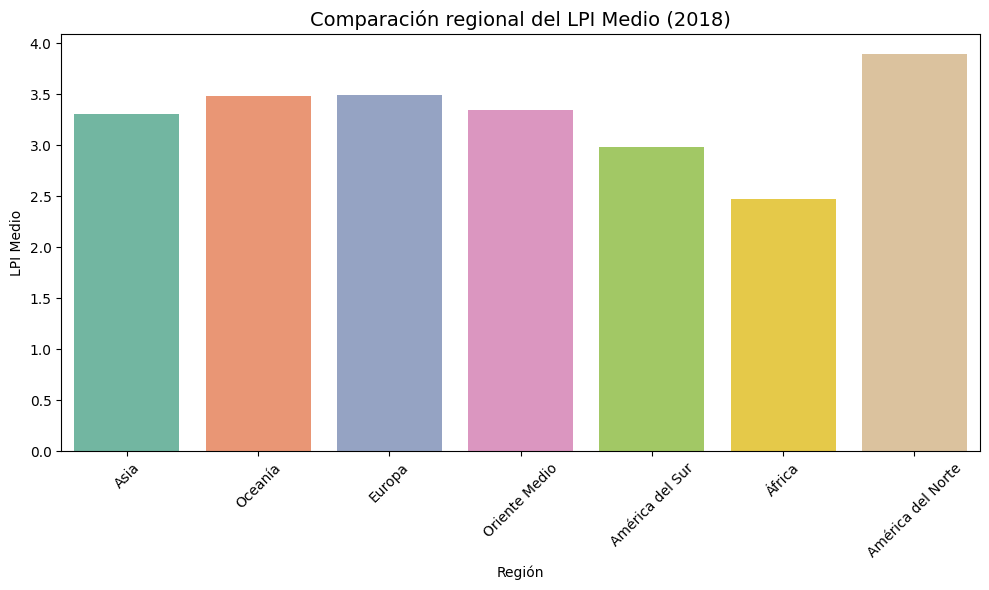

In [369]:
import seaborn as sns
import matplotlib.pyplot as plt

df_2018 = df_union[df_union['Year'] == 2018]

plt.figure(figsize=(10, 6))
sns.barplot(data=df_2018, x='Región', y='LPI_Medio', estimator='mean', ci=None, palette='Set2')

plt.title("Comparación regional del LPI Medio (2018)", fontsize=14)
plt.ylabel("LPI Medio")
plt.xlabel("Región")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [370]:
df_2018.groupby('Región')['Indice_LPI_Custo'].mean().sort_values(ascending=False)

Región
Europa                    inf
América del Norte    0.006793
Asia                 0.004738
Oceanía              0.003280
América del Sur      0.003251
Oriente Medio        0.002912
África               0.001629
Name: Indice_LPI_Custo, dtype: float64

In [371]:
df_europa = df_2018[df_2018['Región'] == 'Europa']

import plotly.express as px
fig = px.choropleth(
    df_europa,
    locations="ISO3",
    color="Indice_LPI_Custo",
    hover_name="Country_clean",
    color_continuous_scale="Viridis",
    title="Eficiencia Logística en Europa (2018)"
)
fig.show()

In [372]:
df_union.to_csv("dados_com_regioes.csv", index=False)

In [373]:
import pycountry

def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None

df_union['Country_clean'] = df_union['Country'].str.title().str.strip()
df_union['ISO3'] = df_union['Country_clean'].apply(get_iso3)

In [374]:
df_europa = df_union[df_union['Región'] == 'Europa']

df_europa_media = (
    df_europa.groupby(['Country', 'ISO3', 'Country_clean'], as_index=False)
    .agg({'Indice_LPI_Custo': 'mean'})
)

import plotly.express as px
fig = px.choropleth(
    df_europa_media,
    locations="ISO3",
    color="Indice_LPI_Custo",
    hover_name="Country_clean",
    color_continuous_scale="Viridis",
    title="Eficiencia Logística Promedio en Europa (2014–2018)"
)

fig.update_layout(
    geo=dict(scope="europe", showframe=False, showcoastlines=True),
    coloraxis_colorbar=dict(title="LPI / Costo Promedio")
)

fig.show()

In [375]:
paises_europa = set(df_union[df_union['Región'] == 'Europa']['Country'].unique())

paises_com_dados = set(df_europa_media['Country'].unique())

paises_sem_dados = sorted(paises_europa - paises_com_dados)
print("Países europeus sem dados no mapa:")
print(paises_sem_dados)

Países europeus sem dados no mapa:
[]


In [378]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [380]:
df_union["Costo_Total"] = df_union[["Cost 1", "Cost 2", "Cost 3", "Cost 4"]].sum(axis=1)

In [381]:
lpi_cols = [col for col in df_union.columns if col.startswith("LPI -") and df_union[col].dtype in ["float64", "int64"]]
df_union["LPI_Medio"] = df_union[lpi_cols].mean(axis=1)

In [382]:
df_union['Indice_LPI_Costo'] = df_union['LPI_Medio'] / df_union['Costo_Total']

In [384]:
df_union[df_union['Costo_Total'].isna()]['Región'].value_counts()

Series([], Name: count, dtype: int64)

In [385]:
df_union[df_union['LPI_Medio'].isna()]['Región'].value_counts()

Series([], Name: count, dtype: int64)

In [387]:
df_valid = df_union.dropna(subset=["LPI_Medio", "Costo_Total"])

In [388]:
df_valid["Indice_LPI_Costo"] = df_valid["LPI_Medio"] / df_valid["Costo_Total"]

df_eficiencia_regional = (
    df_valid.groupby("Región", as_index=False)
    .agg({"Indice_LPI_Costo": "mean"})
    .sort_values(by="Indice_LPI_Costo", ascending=False)
)